# Proyek Analisis Data: Bike Sharing
- **Nama:** Alzan Adytia Juniar
- **Email:** alzanadytia.j@gmail.com
- **ID Dicoding:** alzan_adytia_juniar

## Menentukan Pertanyaan Bisnis

- Bagaimana pola jumlah penyewaan sepeda berdasarkan waktu, baik secara jam maupun bulanan? Pada jam dan bulan berapa penyewaan meningkat?
- Seberapa sering pelanggan menyewa sepeda dalam beberapa bulan terakhir?
- Pada musim apa jumlah penyewaan sepeda mencapai puncaknya?

## Import Semua Packages/Library yang Digunakan

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

upload dataset untuk data "day.csv" & "hour.csv"

In [21]:
df_day = pd.read_csv("day.csv", delimiter=",")
df_hour = pd.read_csv("hour.csv", delimiter=",")

Menampilan 5 data pada dataset "day.csv"

In [22]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Menampilan 5 data pada dataset "hour.csv"

In [23]:
df_hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


Menggabungkan dataset "day.csv" dan "hour.csv" lalu mengganti nama kolom menyesuaikan kategori dengan menambahkan kata day dan hour

In [24]:
bike_merge = df_day.merge(
    df_hour,
    on='dteday',
    how='inner',
    suffixes=('_daily', '_hourly')
)
bike_merge

,instant_daily,dteday,season_daily,yr_daily,mnth_daily,holiday_daily,weekday_daily,workingday_daily,weathersit_daily,temp_daily,...,weekday_hourly,workingday_hourly,weathersit_hourly,temp_hourly,atemp_hourly,hum_hourly,windspeed_hourly,casual_hourly,registered_hourly,cnt_hourly
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,731,2012-12-31,1,1,12,0,1,1,2,0.215833,...,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,731,2012-12-31,1,1,12,0,1,1,2,0.215833,...,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,731,2012-12-31,1,1,12,0,1,1,2,0.215833,...,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,731,2012-12-31,1,1,12,0,1,1,2,0.215833,...,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


### Assessing Data

Memeriksa tipe data

In [25]:
bike_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   instant_daily      17379 non-null  int64  
 1   dteday             17379 non-null  object 
 2   season_daily       17379 non-null  int64  
 3   yr_daily           17379 non-null  int64  
 4   mnth_daily         17379 non-null  int64  
 5   holiday_daily      17379 non-null  int64  
 6   weekday_daily      17379 non-null  int64  
 7   workingday_daily   17379 non-null  int64  
 8   weathersit_daily   17379 non-null  int64  
 9   temp_daily         17379 non-null  float64
 10  atemp_daily        17379 non-null  float64
 11  hum_daily          17379 non-null  float64
 12  windspeed_daily    17379 non-null  float64
 13  casual_daily       17379 non-null  int64  
 14  registered_daily   17379 non-null  int64  
 15  cnt_daily          17379 non-null  int64  
 16  instant_hourly     173

Dari hasil output di atas, diperoleh tipe data dteday yang tidak sesuai

Memeriksa missing values yang terdapat dalam setiap kolom

In [26]:
bike_merge.isna().sum()

instant_daily        0
dteday               0
season_daily         0
yr_daily             0
mnth_daily           0
holiday_daily        0
weekday_daily        0
workingday_daily     0
weathersit_daily     0
temp_daily           0
atemp_daily          0
hum_daily            0
windspeed_daily      0
casual_daily         0
registered_daily     0
cnt_daily            0
instant_hourly       0
season_hourly        0
yr_hourly            0
mnth_hourly          0
hr                   0
holiday_hourly       0
weekday_hourly       0
workingday_hourly    0
weathersit_hourly    0
temp_hourly          0
atemp_hourly         0
hum_hourly           0
windspeed_hourly     0
casual_hourly        0
registered_hourly    0
cnt_hourly           0
dtype: int64

Dari hasil di atas, dapat ditunjukan bahwa tidak ada data yang missing value

Memeriksa duplikasi data

In [27]:
print("Jumlah duplikasi: ", bike_merge.duplicated().sum())

Jumlah duplikasi:  0


Dari output di atas, dapat ditunjukan bahwa tidak ada data yang duplikat

Memeriksa parameter statistik dari kolom numerik

In [28]:
bike_merge.describe()

,instant_daily,season_daily,yr_daily,mnth_daily,holiday_daily,weekday_daily,workingday_daily,weathersit_daily,temp_daily,atemp_daily,...,weekday_hourly,workingday_hourly,weathersit_hourly,temp_hourly,atemp_hourly,hum_hourly,windspeed_hourly,casual_hourly,registered_hourly,cnt_hourly
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,367.172622,2.501640,0.502561,6.537775,0.028770,3.003683,0.682721,1.391680,0.496987,0.475775,...,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,210.072051,1.106918,0.500008,3.438776,0.167165,2.005771,0.465431,0.540501,0.182445,0.162426,...,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,...,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,185.000000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.338363,...,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,367.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.502500,0.490122,...,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,549.000000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655833,0.610488,...,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,...,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Dari output di atas, dapat ditunjukan bahwa tidak ada data yang outlier

Dari proses assesing data di atas, diperoleh kesimpulan bahwa data bike_merge tidak ada data yang missing value, duplicate, maupun inaccurate. Namun, terdapat satu kolom yang tidak sesuai dengan tipe data yang seharusnya yakni dteday

### Cleaning Data

Mengganti tipe data pada kolom dteday menjadi datetime

In [29]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  bike_merge[column] = pd.to_datetime(bike_merge[column])

In [30]:
bike_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   instant_daily      17379 non-null  int64         
 1   dteday             17379 non-null  datetime64[ns]
 2   season_daily       17379 non-null  int64         
 3   yr_daily           17379 non-null  int64         
 4   mnth_daily         17379 non-null  int64         
 5   holiday_daily      17379 non-null  int64         
 6   weekday_daily      17379 non-null  int64         
 7   workingday_daily   17379 non-null  int64         
 8   weathersit_daily   17379 non-null  int64         
 9   temp_daily         17379 non-null  float64       
 10  atemp_daily        17379 non-null  float64       
 11  hum_daily          17379 non-null  float64       
 12  windspeed_daily    17379 non-null  float64       
 13  casual_daily       17379 non-null  int64         
 14  regist

## Exploratory Data Analysis (EDA)

### Explore ...

In [31]:
bike_merge.describe(include="all")

,instant_daily,dteday,season_daily,yr_daily,mnth_daily,holiday_daily,weekday_daily,workingday_daily,weathersit_daily,temp_daily,...,weekday_hourly,workingday_hourly,weathersit_hourly,temp_hourly,atemp_hourly,hum_hourly,windspeed_hourly,casual_hourly,registered_hourly,cnt_hourly
count,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,367.172622,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,0.028770,3.003683,0.682721,1.391680,0.496987,...,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,...,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,185.000000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.340000,...,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,367.000000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.502500,...,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,549.000000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655833,...,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,...,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,210.072051,NaN,1.106918,0.500008,3.438776,0.167165,2.005771,0.465431,0.540501,0.182445,...,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


Hasil output di atas menunjukan bahwa terdapat 4 musim selama tahun 2011-2012.

Berdasarkan penjelasan dataset pada kaggle diperoleh bahwa masing-masing angka pada kolom season memiliki interpretasi masing-masing.



1.   Clear, Few clouds, Partly cloudy, Partly cloudy
2.   Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3.  Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

Rata-rata musim yang terjadi ditunjukan pada angka 2.501640 yang artinya musim berada di antara mist+claudy dan light snow



Menunjukan jenis musim ketika sewa sepeda memiliki banyak penyewa

In [32]:
bike_merge.groupby(by="season_daily").cnt_daily.count()

season_daily
1    4242
2    4409
3    4496
4    4232
Name: cnt_daily, dtype: int64

Hasil output di atas menunjukan bahwa pada musim ke-3 atau musim _"Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds"_ memiliki jumlah penyewa yang terbanyak yakni sebesar 4496

Menunjukan jam ketika terdapat banyak penyewa

In [33]:
bike_merge.groupby(by="hr").cnt_hourly.count()

hr
0     726
1     724
2     715
3     697
4     697
5     717
6     725
7     727
8     727
9     727
10    727
11    727
12    728
13    729
14    729
15    729
16    730
17    730
18    728
19    728
20    728
21    728
22    728
23    728
Name: cnt_hourly, dtype: int64

## Visualization & Explanatory Analysis

### Pertanyaan 1: Seberapa sering pelanggan menyewa sepeda dalam beberapa bulan terakhir?

Menggunakan RFM analysis untuk mendapatkan nilai frequency tingkat keseringan seorang pelanggan melakukan sewa dalam beberapa bulan terakhir

In [34]:
tanggal_sekarang = bike_merge['dteday'].max()

rf_df = bike_merge.groupby('mnth_daily').agg({
    'dteday': lambda x: (tanggal_sekarang - x.max()).days,
    'cnt_daily': 'count'
}).reset_index()

# Mengganti nama kolom
rf_df.columns = ['month', 'recency', 'frequency']

# Menampilkan DataFrame RF
print(rf_df)

    month  recency  frequency
0       1      335       1429
1       2      306       1341
2       3      275       1473
3       4      245       1437
4       5      214       1488
5       6      184       1440
6       7      153       1488
7       8      122       1475
8       9       92       1437
9      10       61       1451
10     11       31       1437
11     12        0       1483


C:\Users\alzan\AppData\Local\Temp\ipykernel_13196\2519904047.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="frequency", x="month", data=rf_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
C:\Users\alzan\AppData\Local\Temp\ipykernel_13196\2519904047.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x="month", data=rf_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])


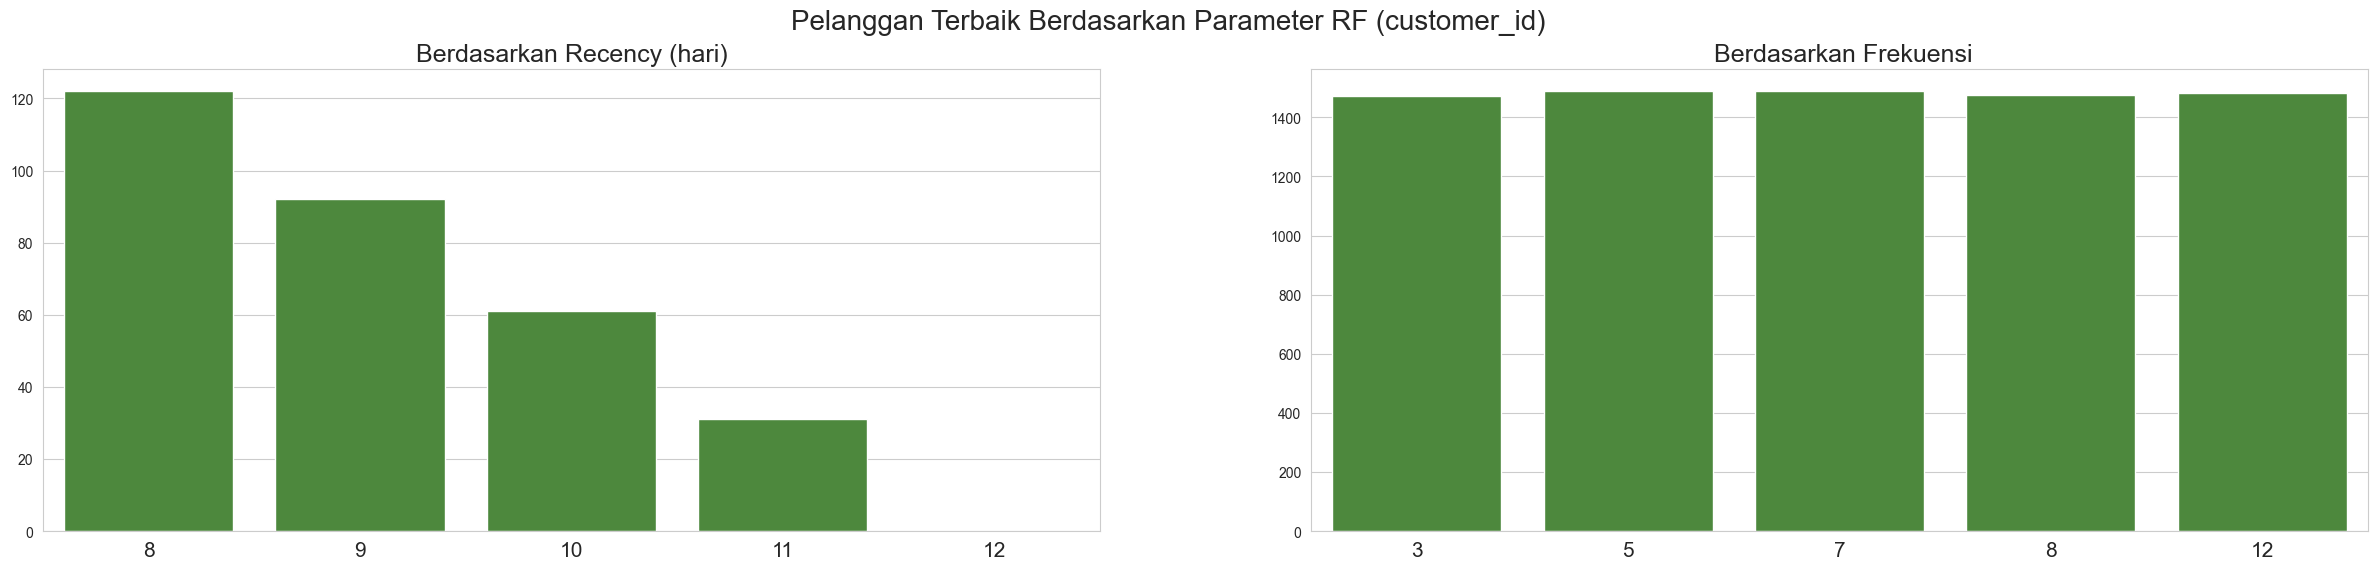

In [39]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(30, 6))

colors = ["#469530", "#469530", "#469530", "#469530", "#469530"]

sns.barplot(y="frequency", x="month", data=rf_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_xlabel(None)
ax[1].set_ylabel(None)
ax[1].set_title(" Berdasarkan Frekuensi", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)


sns.barplot(y="recency", x="month", data=rf_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Berdasarkan Recency (hari)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)


plt.suptitle("Pelanggan Terbaik Berdasarkan Parameter RF (customer_id)", fontsize=20)
plt.show()

### Pertanyaan 2: Pada musim apa jumlah penyewaan sepeda mencapai puncaknya?

C:\Users\alzan\AppData\Local\Temp\ipykernel_13196\4084704541.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\alzan\AppData\Local\Temp\ipykernel_13196\4084704541.py:6: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(


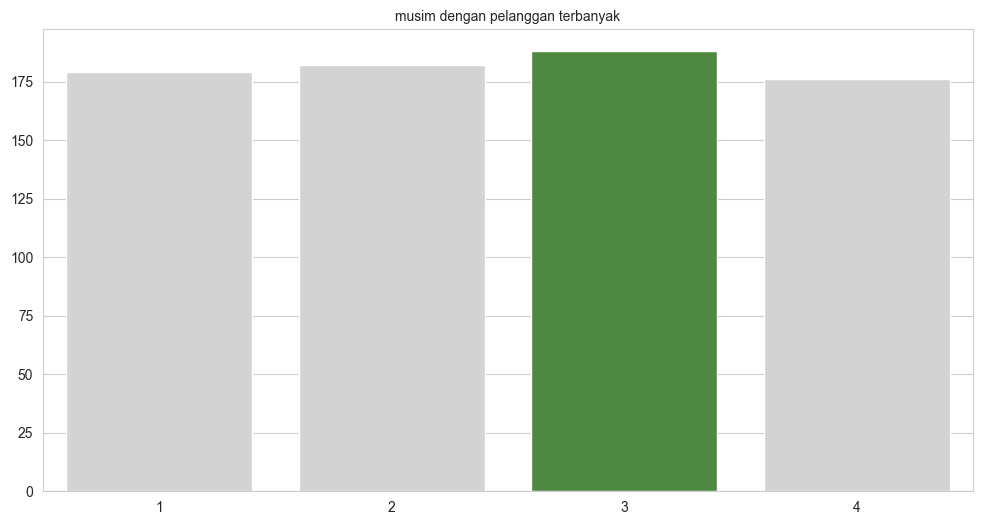

In [36]:
colors = ["#D3D3D3", "#D3D3D3", "#469536", "#D3D3D3", "#D3D3D3"]
byseason_df = bike_merge.groupby(by="season_daily").cnt_daily.nunique().reset_index()

plt.figure(figsize=(12, 6))

sns.barplot(
    y="cnt_daily",
    x="season_daily",
    data=byseason_df.sort_values(by="cnt_daily", ascending=False),
    palette=colors
)
plt.title("musim dengan pelanggan terbanyak", loc="center", fontsize=10)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=10)
plt.show()

Hasil plot di atas menunjukan bahwa pada musim ke-3 atau musim Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds memiliki jumlah penyewa yang terbanyak

### Pertanyaan 3: Bagaimana pola jumlah penyewaan sepeda berdasarkan waktu, baik secara jam maupun bulanan? Pada jam dan bulan berapa penyewaan meningkat?

Pola berdasarkan jam

C:\Users\alzan\AppData\Local\Temp\ipykernel_13196\1380247446.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="hr", y="cnt_hourly", data=bike_merge, ci=None)


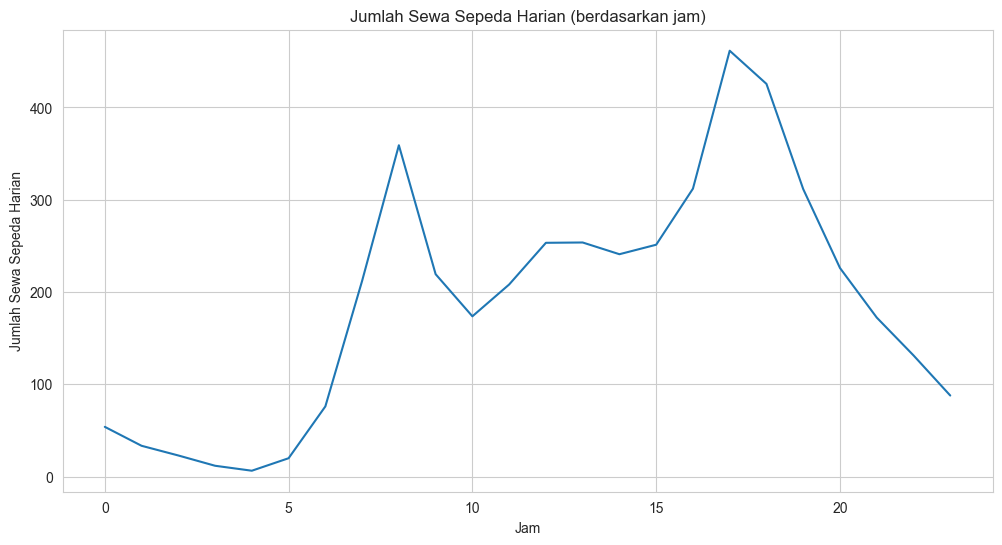

In [37]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x="hr", y="cnt_hourly", data=bike_merge, ci=None)
plt.title("Jumlah Sewa Sepeda Harian (berdasarkan jam)")
plt.xlabel("Jam")
plt.ylabel("Jumlah Sewa Sepeda Harian")
plt.show()

Pola berdasarkan bulan

## Conclusion

- **Kesimpulan Pertanyaan 1:**
  Dalam beberapa bulan terakhir, data menunjukkan bahwa pelanggan sering melakukan penyewaan sepeda, terlihat dari nilai recency yang menurun. Selain itu, frekuensi penyewaan yang tinggi juga menunjukkan adanya peningkatan jumlah penyewa pada periode tersebut.

- **Kesimpulan Pertanyaan 2:**
  Analisis data bike sharing mengungkapkan bahwa jumlah pelanggan paling tinggi terjadi pada musim "Light Snow, Light Rain + Thunderstorm + Scattered clouds, dan Light Rain + Scattered clouds." Ini mungkin disebabkan oleh preferensi pelanggan untuk bersepeda dalam cuaca yang tidak terlalu panas, membuat musim-musim tersebut ideal untuk aktivitas bersepeda.

- **Kesimpulan Pertanyaan 3:**
  Data menunjukkan bahwa penyewaan sepeda cenderung meningkat pada jam 16.00-17.00, mengindikasikan bahwa banyak pelanggan yang memilih waktu sore untuk bersepeda.